# 01 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles
# statistical models.
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or
# feature. These are more relevant to developers and very seldom to analysts.
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:\n",
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.
%matplotlib inline

# 02 - Import Data

In [3]:
# import playoffsbio data set
path = r'C:\Users\jakey\OneDrive\Documents\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\Project Folder'

In [4]:
# import set
df_playoffsbio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'playoffsbio.csv'), index_col = False)

# 03 - Data Cleaning

In [5]:
df_playoffsbio.shape

(5307, 21)

In [6]:
df_playoffsbio.head()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,day,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range
0,8471716,2008,Justin,Abdelkader,DET,L,10,4180,3.77,1987,...,25,214,74,USA,L,8,runner-up,north_america,21,under23
1,8471716,2009,Justin,Abdelkader,DET,L,11,4955,2.18,1987,...,25,214,74,USA,L,8,early,north_america,22,under23
2,8471716,2010,Justin,Abdelkader,DET,L,11,8881,-0.24,1987,...,25,214,74,USA,L,8,early,north_america,23,23-26
3,8471716,2011,Justin,Abdelkader,DET,L,5,3757,0.52,1987,...,25,214,74,USA,L,8,early,north_america,24,23-26
4,8471716,2012,Justin,Abdelkader,DET,L,12,12206,8.38,1987,...,25,214,74,USA,L,8,early,north_america,25,23-26


# 04 - Create a Subset

In [7]:
# create a new column to represent playoff success as number
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'winner', 'playoff_round'] = '4'
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'runner-up', 'playoff_round'] = '3'
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'conference_final', 'playoff_round'] = '2'
df_playoffsbio.loc[df_playoffsbio['playoffs'] == 'early', 'playoff_round'] = '1'

In [8]:
# check the new column
df_playoffsbio.head()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range,playoff_round
0,8471716,2008,Justin,Abdelkader,DET,L,10,4180,3.77,1987,...,214,74,USA,L,8,runner-up,north_america,21,under23,3
1,8471716,2009,Justin,Abdelkader,DET,L,11,4955,2.18,1987,...,214,74,USA,L,8,early,north_america,22,under23,1
2,8471716,2010,Justin,Abdelkader,DET,L,11,8881,-0.24,1987,...,214,74,USA,L,8,early,north_america,23,23-26,1
3,8471716,2011,Justin,Abdelkader,DET,L,5,3757,0.52,1987,...,214,74,USA,L,8,early,north_america,24,23-26,1
4,8471716,2012,Justin,Abdelkader,DET,L,12,12206,8.38,1987,...,214,74,USA,L,8,early,north_america,25,23-26,1


In [9]:
df_quant = df_playoffsbio[['season','games_played','icetime','gameScore','year','month','weight','height','age','playoff_round']]

In [17]:
# create subsets by grouping "playoff" as well as "year"
df_quant = df_quant.groupby('season').agg({'games_played':['mean', 'median'],'icetime':['mean', 'median'],'gameScore':['mean', 'median'], 'year':['mean', 'median'], 'month':['mean', 'median'], 'weight':['mean', 'median'], 'height':['mean', 'median'], 'age':['mean', 'median'], 'playoff_round':['mean', 'median']})

In [18]:
# check new data
df_quant

games_played              icetime         gameScore         \
                   mean median          mean  median      mean median   
season                                                                  
2008-01-01     9.156425    7.0  10452.474860  7188.5  4.103544  2.350   
2009-01-01     9.203252    7.0  10566.216802  7437.0  4.440731  2.355   
2010-01-01     9.239011    7.0  10754.552198  7488.5  4.315929  2.900   
2011-01-01     8.824798    7.0  10316.061995  7209.0  3.625718  2.580   
2012-01-01     8.811828    7.0  10427.204301  7264.5  3.805673  2.250   
2013-01-01     9.545699    7.0  11161.338710  7802.0  4.405378  2.635   
2014-01-01     9.301370    7.0  10848.200000  7138.0  4.031180  2.610   
2015-01-01     9.440217    6.0  10927.029891  7572.0  4.204529  2.175   
2016-01-01     9.038147    6.0  10668.732970  7092.0  3.968459  2.640   
2017-01-01     8.759669    6.0  10041.306630  6993.5  4.229039  2.350   
2018-01-01     9.332394    7.0  10808.081690  7606.0  4.232973  2.530   
2019-01-01     8.881720    8.0  10385.564516  7350.5  4.085039  2.100   
2020-01-01     8.858726    7.0  10441.152355  7384.0  4.017448  2.560   
2021-01-01     9.315068    7.0  10593.230137  7805.0  4.741164  3.190   

                   year             month             weight         \
                   mean  median      mean median        mean median   
season                                                                
2008-01-01  1980.259777  1981.0  5.924581    6.0  204.955307  204.0   
2009-01-01  1981.433604  1982.0  6.013550    6.0  203.888889  204.0   
2010-01-01  1982.409341  1983.0  6.008242    6.0  204.565934  205.0   
2011-01-01  1983.436658  1984.0  5.959569    6.0  204.884097  205.0   
2012-01-01  1984.752688  1985.0  5.989247    6.0  205.311828  206.0   
2013-01-01  1985.801075  1986.0  6.131720    6.0  203.454301  204.0   
2014-01-01  1987.068493  1987.0  6.180822    6.0  202.517808  203.0   
2015-01-01  1987.771739  1988.0  6.241848    6.0  202.850543  203.0   
2016-01-01  1988.991826  1989.0  6.280654    6.0  201.643052  202.0   
2017-01-01  1990.116022  1991.0  6.245856    6.0  200.314917  201.0   
2018-01-01  1991.163380  1992.0  6.315493    6.0  201.247887  201.0   
2019-01-01  1992.198925  1992.0  6.148746    6.0  198.985663  198.0   
2020-01-01  1992.540166  1993.0  6.038781    6.0  198.980609  198.0   
2021-01-01  1993.287671  1994.0  5.967123    6.0  198.802740  199.0   

               height               age        playoff_round         
                 mean median       mean median          mean median  
season                                                               
2008-01-01  73.315642   73.0  27.740223   27.0           inf    1.0  
2009-01-01  73.173442   73.0  27.566396   27.0           inf    1.0  
2010-01-01  73.206044   73.0  27.590659   27.0           inf    1.0  
2011-01-01  73.253369   73.0  27.563342   27.0           inf    1.0  
2012-01-01  73.247312   73.0  27.247312   27.0           inf    1.0  
2013-01-01  73.139785   73.0  27.198925   27.0           inf    1.0  
2014-01-01  73.202740   73.0  26.931507   27.0           inf    1.0  
2015-01-01  73.301630   73.0  27.228261   27.0           inf    1.0  
2016-01-01  73.242507   73.0  27.008174   27.0           inf    1.0  
2017-01-01  73.038674   73.0  26.883978   26.0           inf    1.0  
2018-01-01  73.230986   73.0  26.836620   26.0           inf    1.0  
2019-01-01  73.204301   73.0  26.801075   27.0           inf    1.0  
2020-01-01  73.204986   73.0  27.459834   27.0           inf    1.0  
2021-01-01  73.205479   73.0  27.712329   27.0           inf    1.0

In [12]:
# check data
df_quant['playoff_round'].value_counts()

1    3973
2     667
3     338
4     329
Name: playoff_round, dtype: int64

In [13]:
df_quant.isnull().sum()

season             0
games_played       0
icetime            0
gameScore        375
year               0
month              0
weight             0
height             0
age                0
playoff_round      0
dtype: int64

In [14]:
df_quant.head()

,season,games_played,icetime,gameScore,year,month,weight,height,age,playoff_round
0,2008,10,4180,3.77,1987,2,214,74,21,3
1,2009,11,4955,2.18,1987,2,214,74,22,1
2,2010,11,8881,-0.24,1987,2,214,74,23,1
3,2011,5,3757,0.52,1987,2,214,74,24,1
4,2012,12,12206,8.38,1987,2,214,74,25,1


In [36]:
# transform season into datetime
from datetime import datetime
df_quant['season'] = pd.to_datetime(df_quant['season'], format='%Y')

KeyError: 'season'

In [16]:
df_quant.head()

,season,games_played,icetime,gameScore,year,month,weight,height,age,playoff_round
0,2008-01-01,10,4180,3.77,1987,2,214,74,21,3
1,2009-01-01,11,4955,2.18,1987,2,214,74,22,1
2,2010-01-01,11,8881,-0.24,1987,2,214,74,23,1
3,2011-01-01,5,3757,0.52,1987,2,214,74,24,1
4,2012-01-01,12,12206,8.38,1987,2,214,74,25,1


In [26]:
# choose a value
df_weight = df_quant[['weight']]

In [27]:
df_weight.head()

weight       
                  mean median
season                       
2008-01-01  204.955307  204.0
2009-01-01  203.888889  204.0
2010-01-01  204.565934  205.0
2011-01-01  204.884097  205.0
2012-01-01  205.311828  206.0

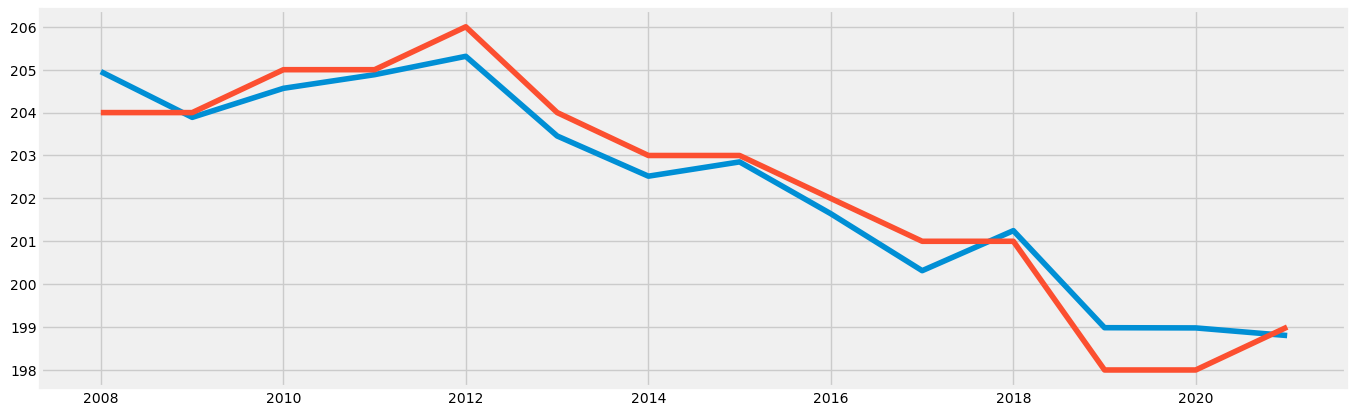

In [32]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_weight)

In [20]:
# Check for missing values (you shouldn't have any)
df_quant.isnull().sum()

games_played   mean      0
               median    0
icetime        mean      0
               median    0
gameScore      mean      0
               median    0
year           mean      0
               median    0
month          mean      0
               median    0
weight         mean      0
               median    0
height         mean      0
               median    0
age            mean      0
               median    0
playoff_round  mean      0
               median    0
dtype: int64

In [21]:
# check for dups
dups = df_quant.duplicated()
dups.sum()

0

# 05 - Time Series Analysis - Decomposition

In [41]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_weight['weight','mean'], model='additive')

In [43]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

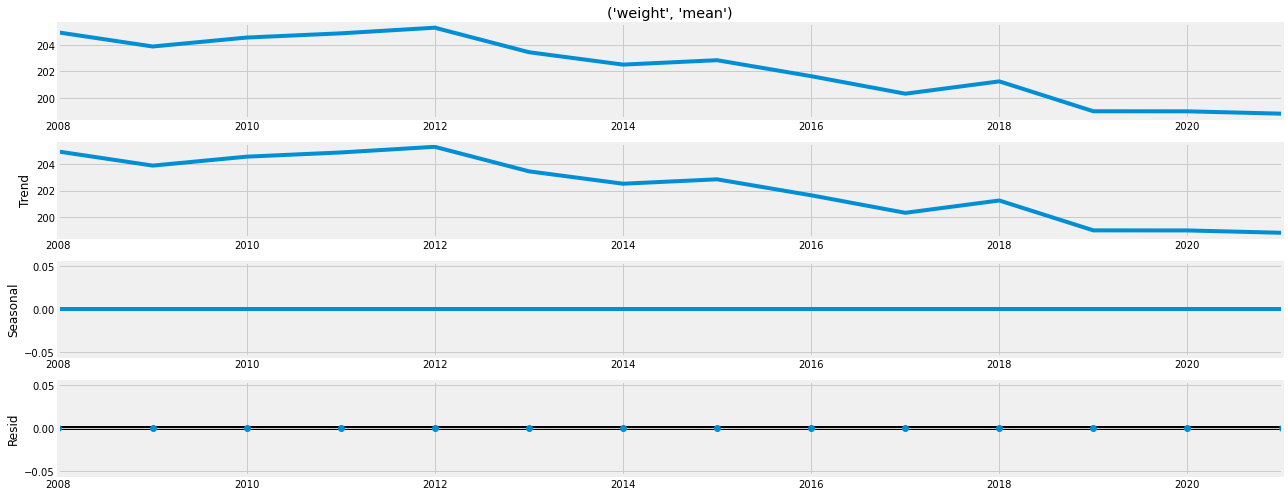

In [44]:
# Plot the separate components
decomposition.plot()
plt.show()

In [42]:
# Decompose the time series using an additive model
decomposition2 = sm.tsa.seasonal_decompose(df_weight['weight','median'], model='additive')

# 06 - Testing for Stationarity

In [72]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_weight['weight','mean'])

(-0.029606900891654398,
 0.9560140476509776,
 5,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 4.783657558872722)

The critical values {1%: -4.665, 5%: -3.367, 10%: -2.803} are less than the test statistic {-0.03) which means the data is not stationary. We will do a round of differencing before testing again.

# 07 - Conduct a round of Differencing

In [81]:
# conduct a round of differencing
data_diff = df_weight['weight','mean'] - df_weight['weight','mean'].shift(1)

In [84]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_diff)

MissingDataError: exog contains inf or nans

In [85]:
# check for nans
data_diff.isnull().sum()

1

In [86]:
data_diff2 = data_diff.dropna()

In [87]:
data_diff2.isnull().sum()

0

In [88]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_diff2)

(-7.484742209094007,
 4.671123327125588e-11,
 4,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 2.7906670358210306)

The critical values {1%: -4.665, 5%: -3.367, 10%: -2.803} are more than the test statistic {-7.485) which means the data is stationary.

# 08 - Check your data's Autocorrelations

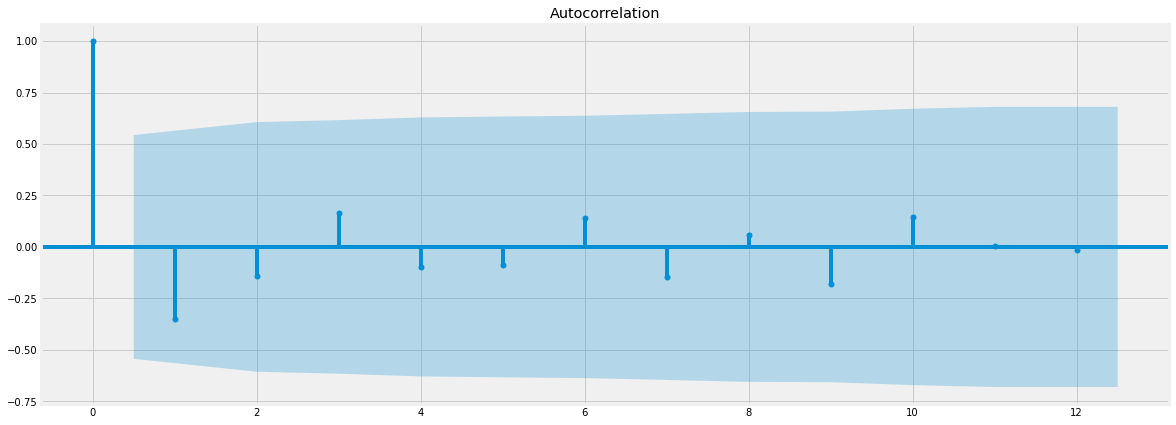

In [89]:
# check autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(data_diff2)
plt.show()